In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!git clone https://github.com/IdanReed/AtariDeepLearning.git
%cd AtariDeepLearning
%load_ext autoreload
%autoreload 2

# Pull data from Vaibhav's google drive
!pip install gdown
!gdown "https://drive.google.com/uc?id=1ExuGJteCja1DQXG_zUAfH6xe4EIFfQfr"
!unzip -q dataset.zip -d /content/dataset


Cloning into 'AtariDeepLearning'...
remote: Enumerating objects: 329, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 329 (delta 74), reused 90 (delta 38), pack-reused 185 (from 1)
Receiving objects: 100% (329/329), 154.30 MiB | 40.29 MiB/s, done.
Resolving deltas: 100% (170/170), done.
/workspace/AtariDeepLearning
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [gdown]
Downloading...
From (original): https://drive.google.com/uc?id=1ExuGJteCja1DQXG_zUAfH6xe4EIFfQfr
From (redirected): https://drive.google.com/uc?id=1ExuGJteCja1DQXG_zUAfH6xe4EIFfQfr&confirm=t&uuid=d0e78efd-cdfc-4074-8ac1-638deccd49c6
To: /workspace/AtariDeepLearning/dataset.zip
100%|███████████████████████████████████████| 3.92G/3.92G [00:22<00:00, 172MB/s]
checkdir:  cannot create extraction directory: /content/dataset
           No such file or directory


In [3]:
!unzip -q dataset.zip -d /tmp/dataset

In [14]:
%cd /content/AtariDeepLearning
!git pull

[Errno 2] No such file or directory: '/content/AtariDeepLearning'
/workspace/AtariDeepLearning
Already up to date.


In [4]:
!pip install optuna

from utils import seed_random_generators
seed_random_generators()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 37.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.9/609.9 kB 7.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [optuna]2m5/6 [optuna]]my]


In [5]:
from pathlib import Path
OUTPUT_DIR = Path("output").joinpath("baseline")

from utils import safe_clear_output_dir
safe_clear_output_dir(OUTPUT_DIR)

# Automatically Sync with Github Code

In [13]:
%cd /content/AtariDeepLearning
!git pull

[Errno 2] No such file or directory: '/content/AtariDeepLearning'
/workspace/AtariDeepLearning
Already up to date.


# Load Data

In [6]:
from npz_loader import load_episodes

dataset_root = Path("/tmp/dataset/dataset")
holdout_game_dirs = [
    dataset_root.joinpath("BeamRiderNoFrameskip-v4", "BeamRiderNoFrameskip-v4"),
    dataset_root.joinpath("BreakoutNoFrameskip-v4", "BreakoutNoFrameskip-v4")
]

main_game_dirs = [
    dataset_root.joinpath("EnduroNoFrameskip-v4", "EnduroNoFrameskip-v4"),
    dataset_root.joinpath("MsPacmanNoFrameskip-v4", "MsPacmanNoFrameskip-v4"),
    dataset_root.joinpath("PongNoFrameskip-v4", "PongNoFrameskip-v4"),
    dataset_root.joinpath("QbertNoFrameskip-v4", "QbertNoFrameskip-v4"),
    dataset_root.joinpath("SeaquestNoFrameskip-v4", "SeaquestNoFrameskip-v4"),
    dataset_root.joinpath("SpaceInvadersNoFrameskip-v4", "SpaceInvadersNoFrameskip-v4")
]
episodes = load_episodes(main_game_dirs, holdout_game_dirs, True)

/tmp/dataset/dataset/
Loaded 1880 episodes


In [7]:
from utils import sample_list
sampled_episodes = sample_list(episodes, fraction=1)

Sampled 1880 items (100.0% of 1880 total)


In [8]:
from epsiode_dataloader import make_train_val_dataloaders

main_bundle, holdout_bundle, bins = make_train_val_dataloaders(
    episodes=sampled_episodes,
    holdout_game_dirs=holdout_game_dirs,
    train_frac=0.8,
    timestep_window_size=4,
)

# Dataloader - Main Games

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 54.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 89.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 38.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [matplotlib]5 [matplotlib]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 81.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [seaborn]m3/4 [seaborn]
Saved plot to output/baseline/dataloader_main_train.png


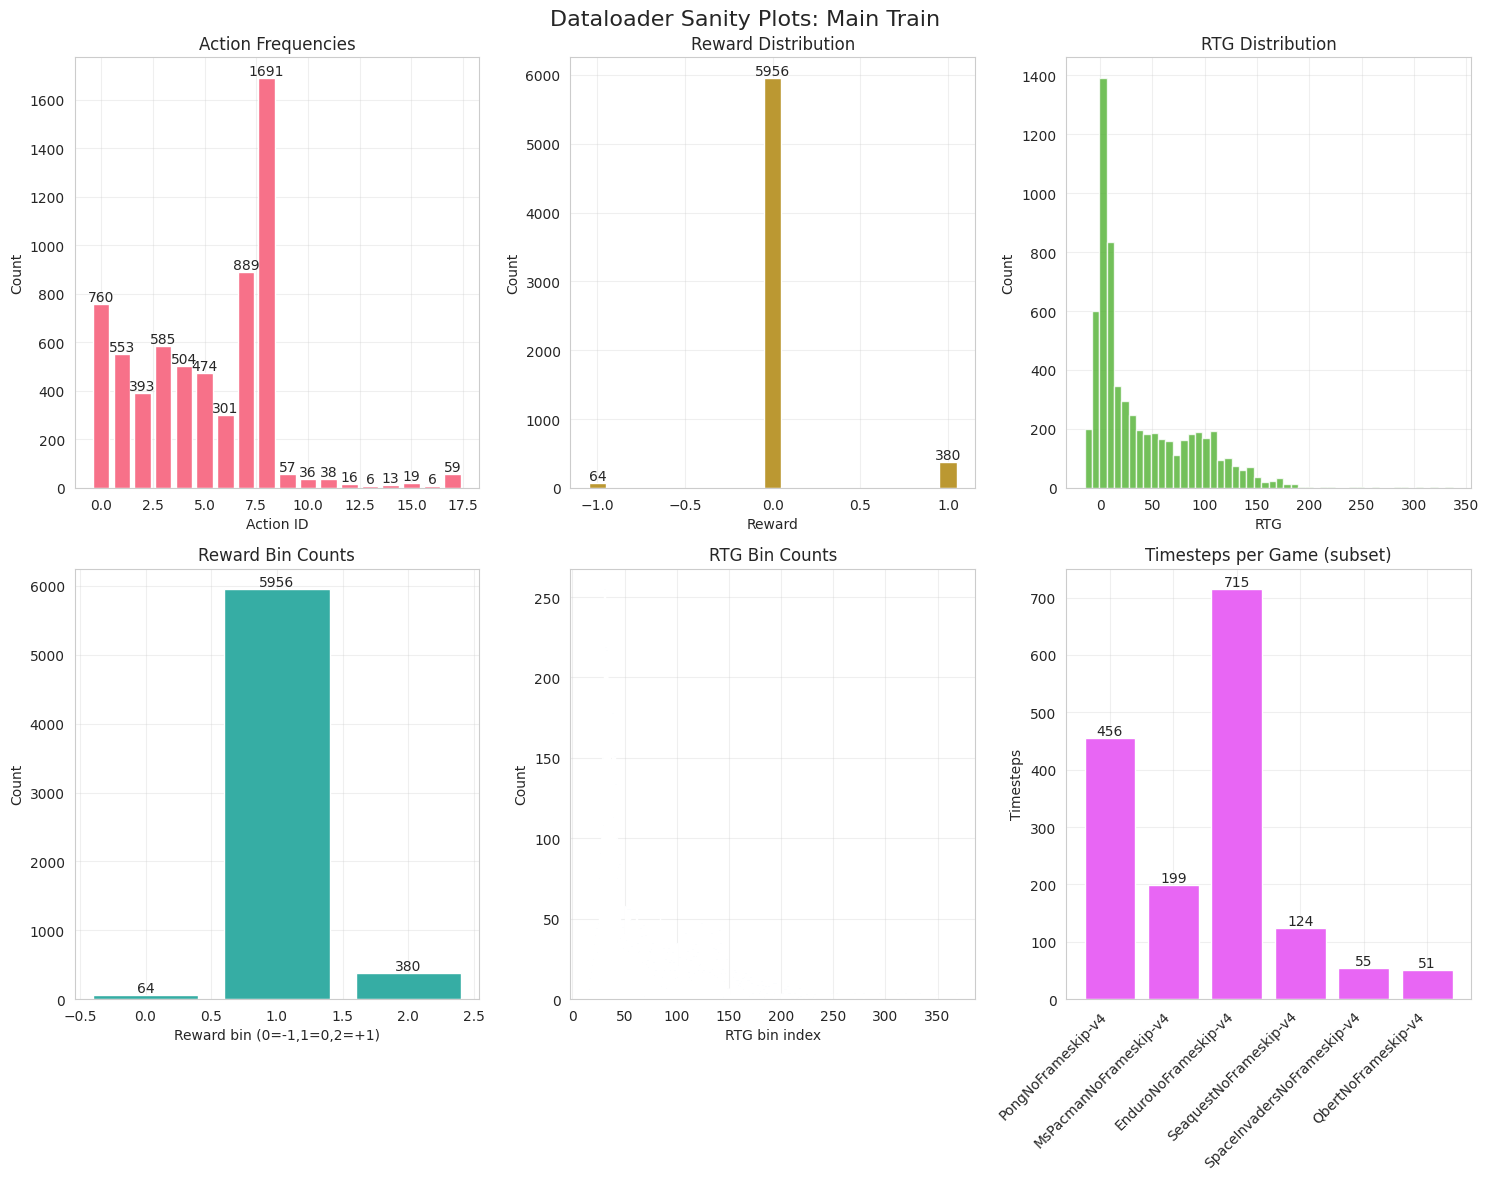

Dataloader size: 41755
Saved plot to output/baseline/dataloader_main_validate.png


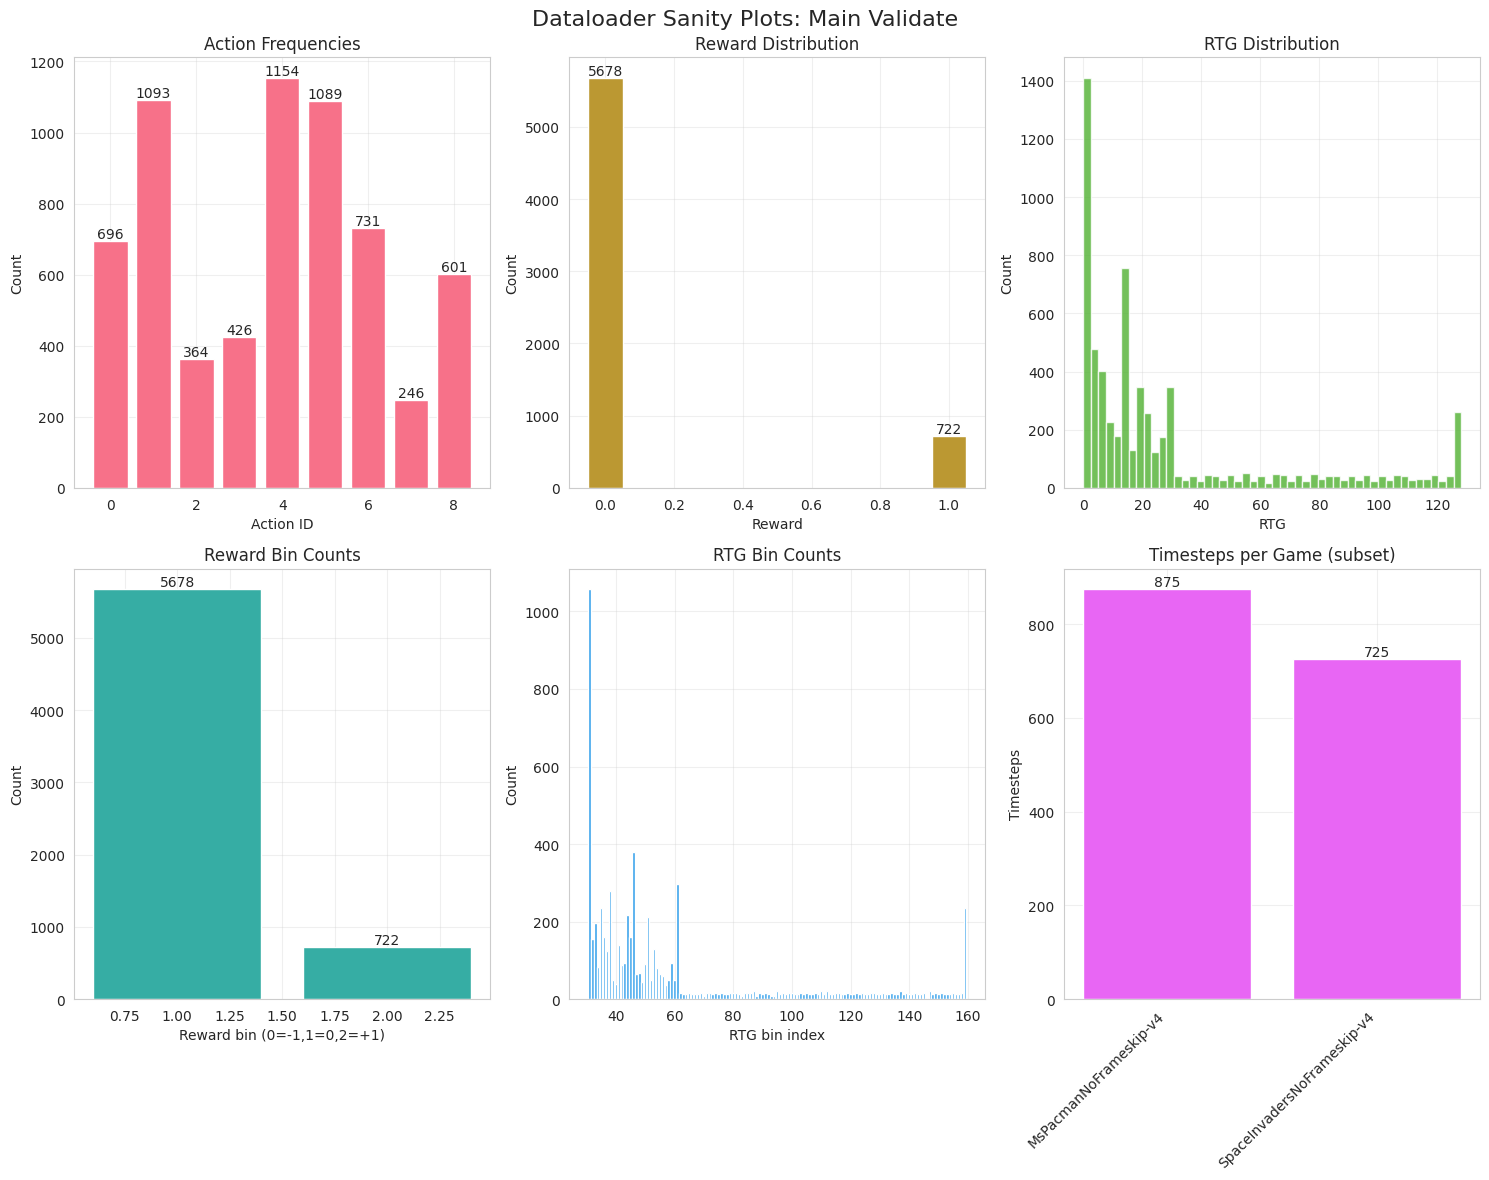

Dataloader size: 9566


In [9]:
!pip install matplotlib
!pip install seaborn
from dataloader_stats import inspect_dataloader

_ = inspect_dataloader(main_bundle.train_loader, "Main Train", output_dir=OUTPUT_DIR)
_ = inspect_dataloader(main_bundle.val_loader, "Main Validate", output_dir=OUTPUT_DIR)

# Dataloader - Holdout Games

Saved plot to output/baseline/dataloader_holdout_train.png


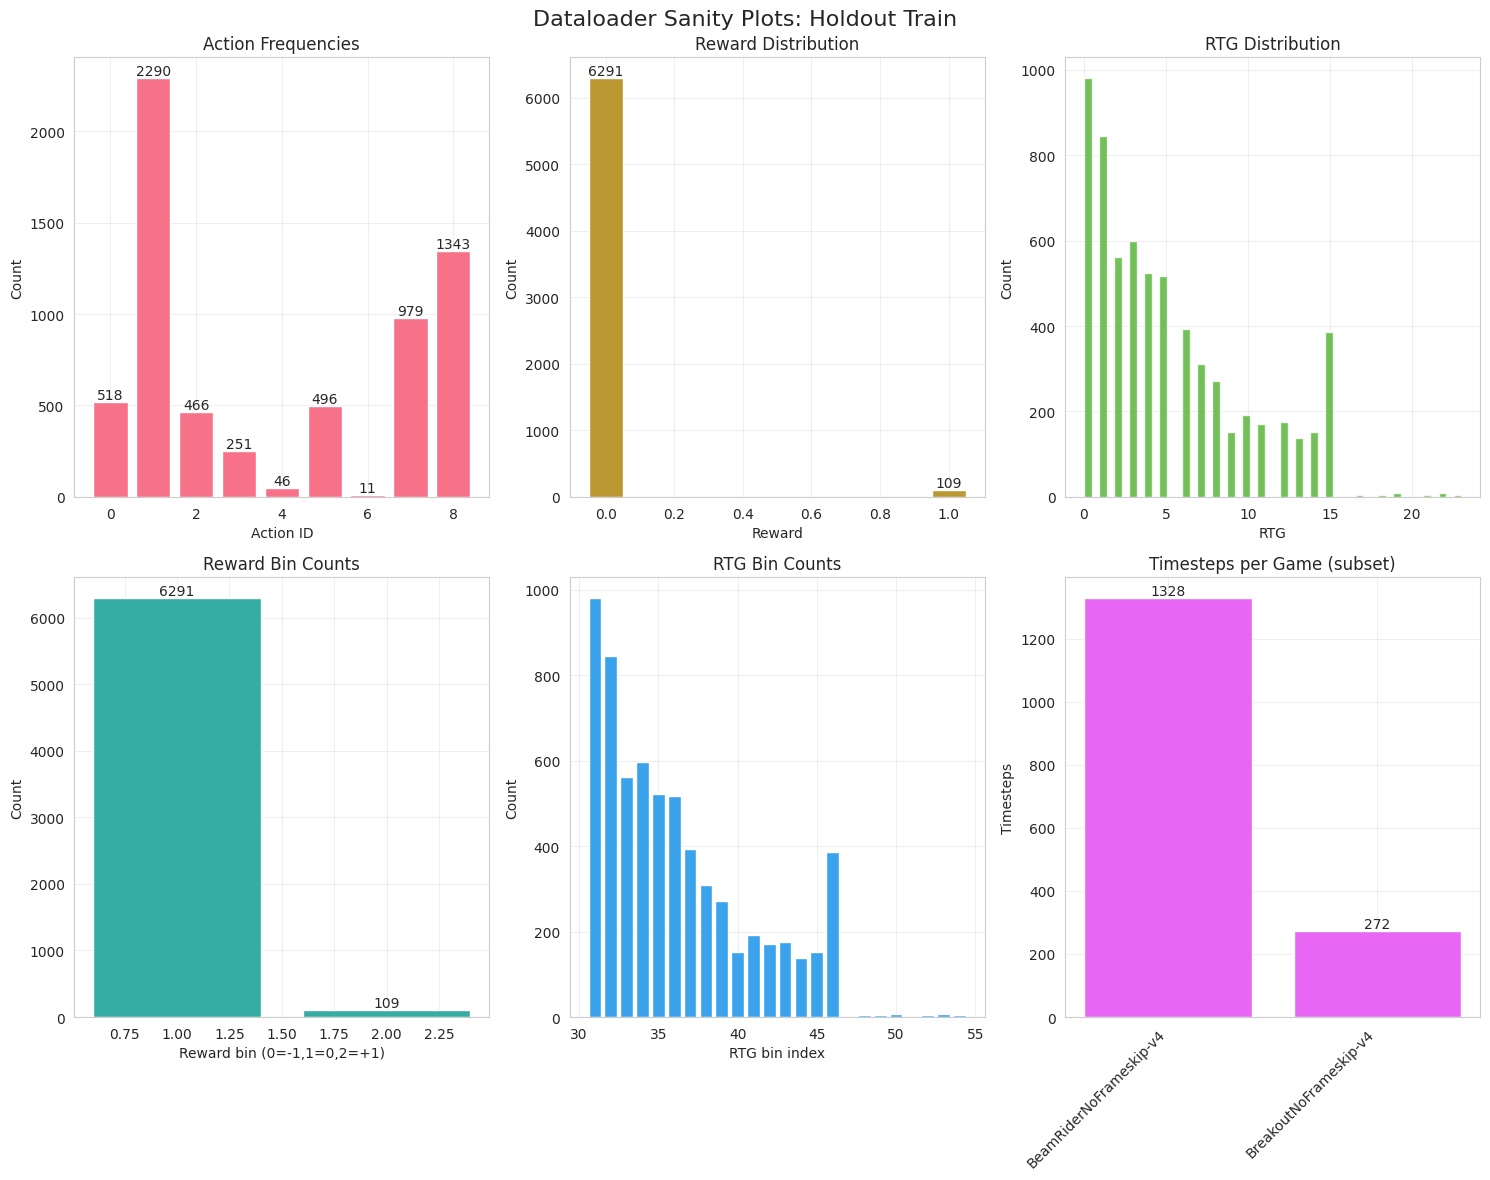

Dataloader size: 4256
Saved plot to output/baseline/dataloader_holdout_validate.png


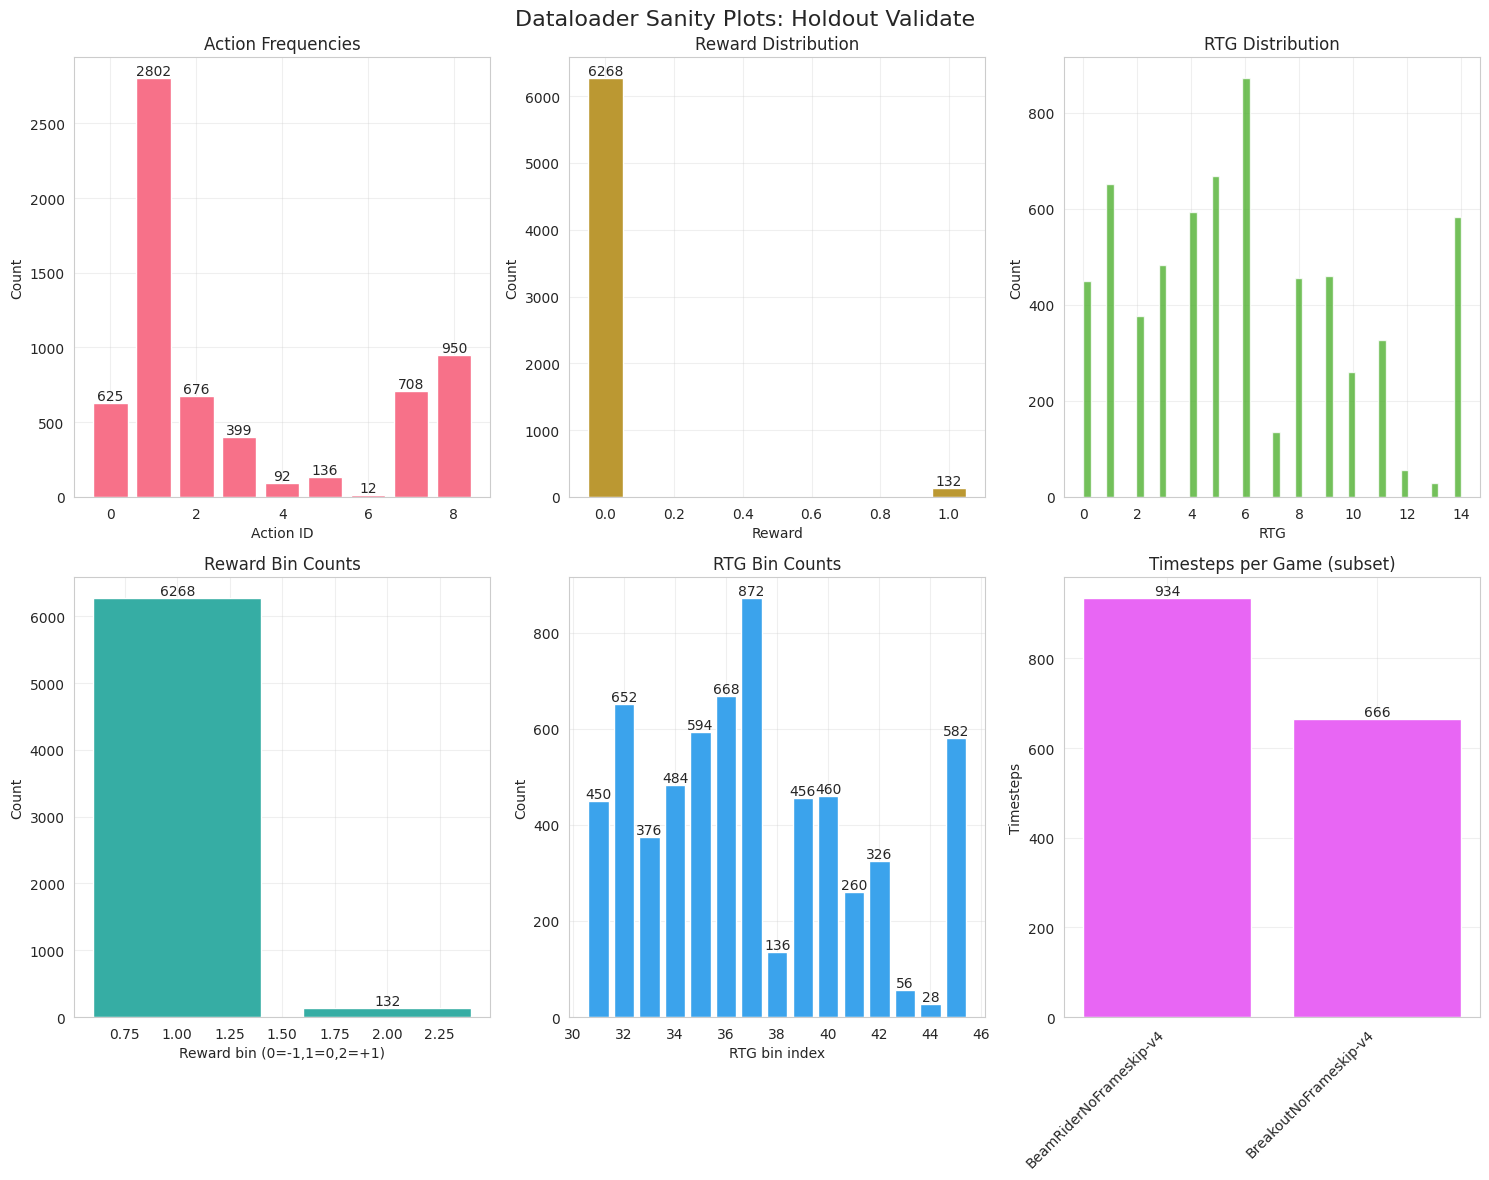

Dataloader size: 1108


In [10]:
_ = inspect_dataloader(holdout_bundle.train_loader, "Holdout Train", output_dir=OUTPUT_DIR)
_ = inspect_dataloader(holdout_bundle.val_loader, "Holdout Validate", output_dir=OUTPUT_DIR)

# Train - Main Games

In [ ]:
from optuna_tuning import run_optuna


study = run_optuna(main_bundle.train_loader, main_bundle.val_loader, bins,
 lr_range = (1e-5, 1e-2),
  emb_size_choices = [64, 128, 256, 512],
                   n_layers_range = (2, 6),
                   n_heads_range=(1,4),
                   num_epochs_range=(1,2))
best_lr = study['learning_rate']
best_emb_size = study['embedding_size']
best_n_layers = study['num_layers']
best_n_heads = study['num_heads']
best_num_epochs = study['num_epochs']

[I 2025-12-09 22:05:27,067] A new study created in memory with name: no-name-40107994-3598-424c-93fd-8674e4e5019c


Trial params: {'lr': 0.0008160409202277325, 'emb_size': 256, 'n_layers': 6, 'n_heads': 4, 'num_epochs': 1}


[W 2025-12-09 22:05:40,793] Trial 0 failed with parameters: {'lr': 0.0008160409202277325, 'emb_size': 256, 'n_layers': 6, 'n_heads': 4, 'num_epochs': 1} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 205, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/content/AtariDeepLearning/optuna_tuning.py", line 33, in objective
    model, main_train_stats, main_val_stats = train_mgdt(
                                              ^^^^^^^^^^^
  File "/content/AtariDeepLearning/mgdt_model_trainer.py", line 101, in train_mgdt
    model = torch.compile(model)
            ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/__init__.py", line 2565, in compile
    return torch._dynamo.optimize(
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py", line 842, in

KeyboardInterrupt: 

In [11]:
!pip install scikit-learn
from mgdt_model_trainer import Encoder, train_mgdt


best_lr = 0.002226768831180977
best_emb_size = 128
best_n_layers = 2
best_n_heads = 2
model, main_train_stats, main_val_stats = train_mgdt(
    bins=bins,
    dataloader_train=main_bundle.train_loader,
    dataloader_val=main_bundle.val_loader,
    encoder_type=Encoder.Patch,
    num_epochs=2,
    #lr=best_lr,
    #emb_size=best_emb_size,
    #n_layers=best_n_layers,
    #n_heads=best_n_heads
)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 58.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 182.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


Epoch 2/2: 100%|██████████| 41755/41755 [14:34<00:00, 47.76it/s]  
                                                               

Saved plot to output/baseline/model_main_losses_per_head.png


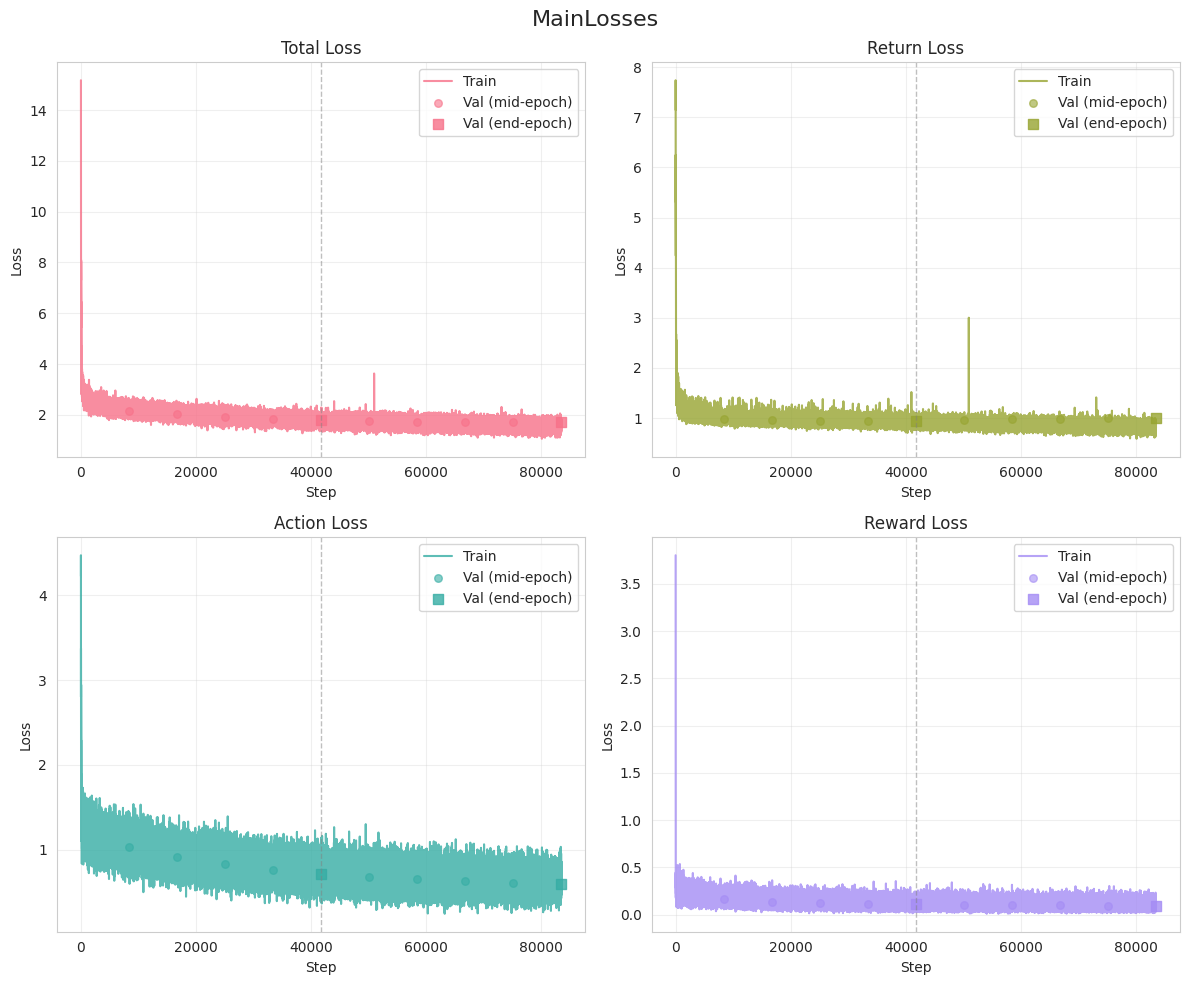

Saved plot to output/baseline/model_main_losses_combined.png


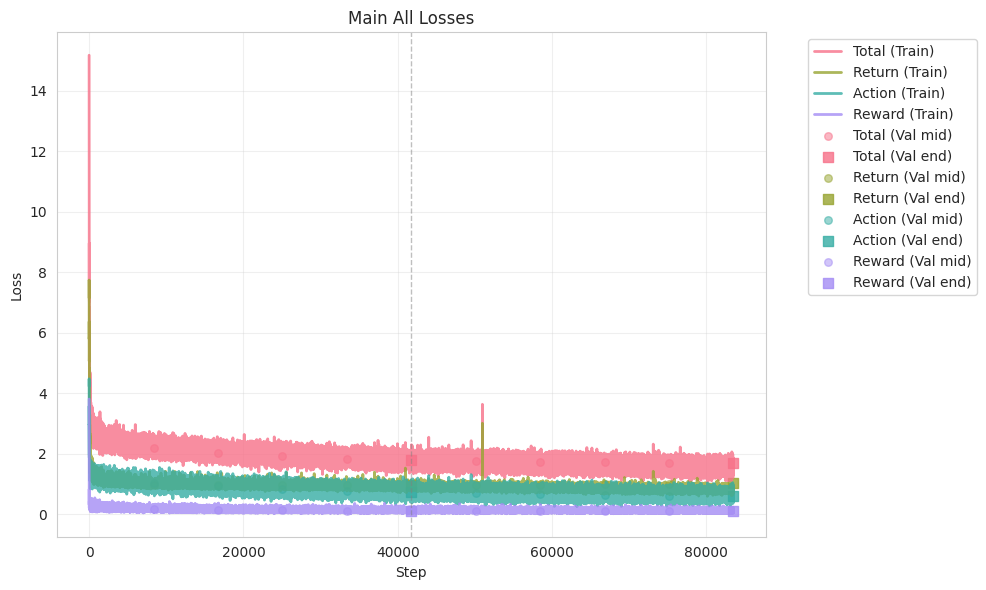

Saved plot to output/baseline/model_main_losses_ema_per_head.png


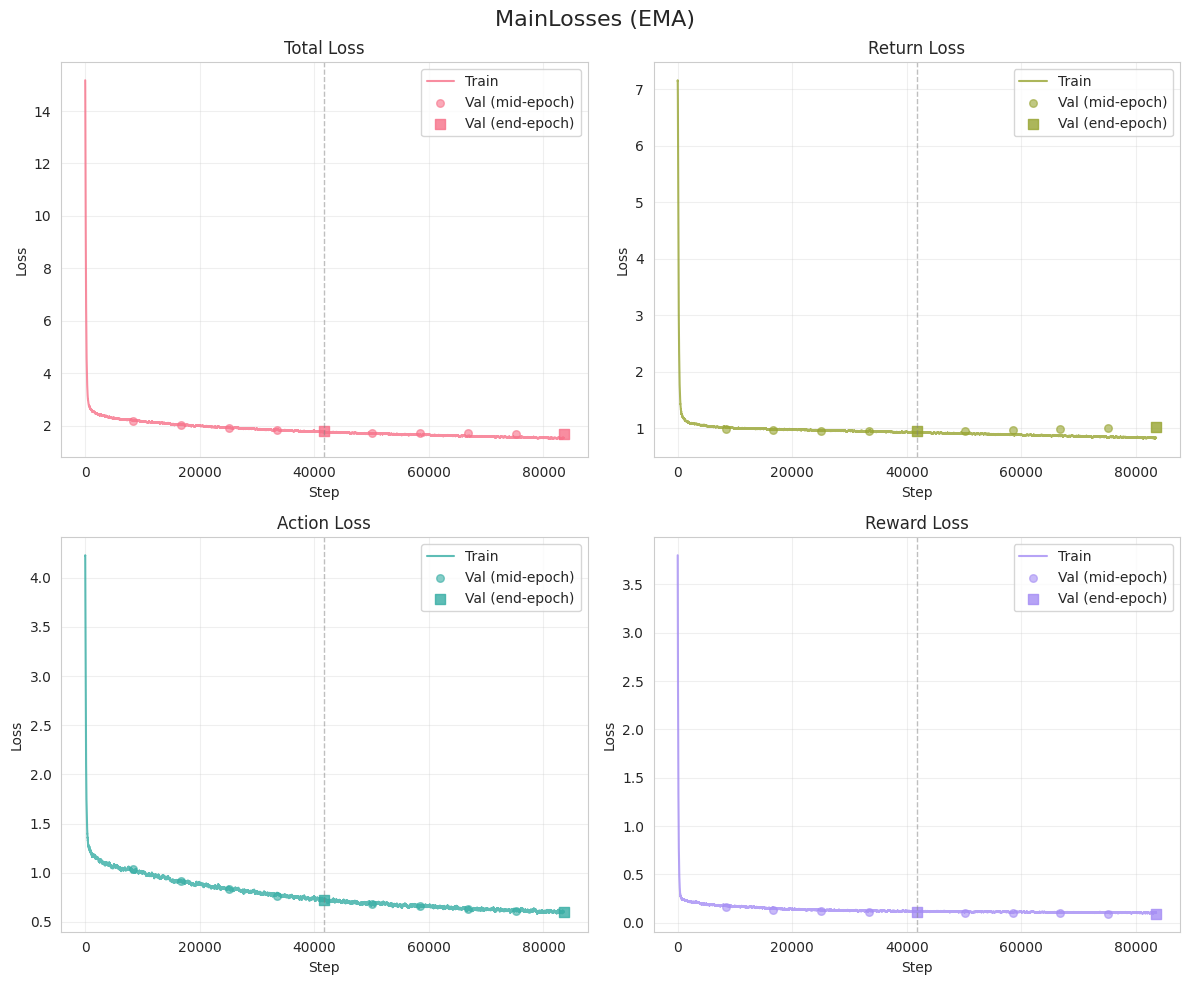

Saved plot to output/baseline/model_main_losses_ema_combined.png


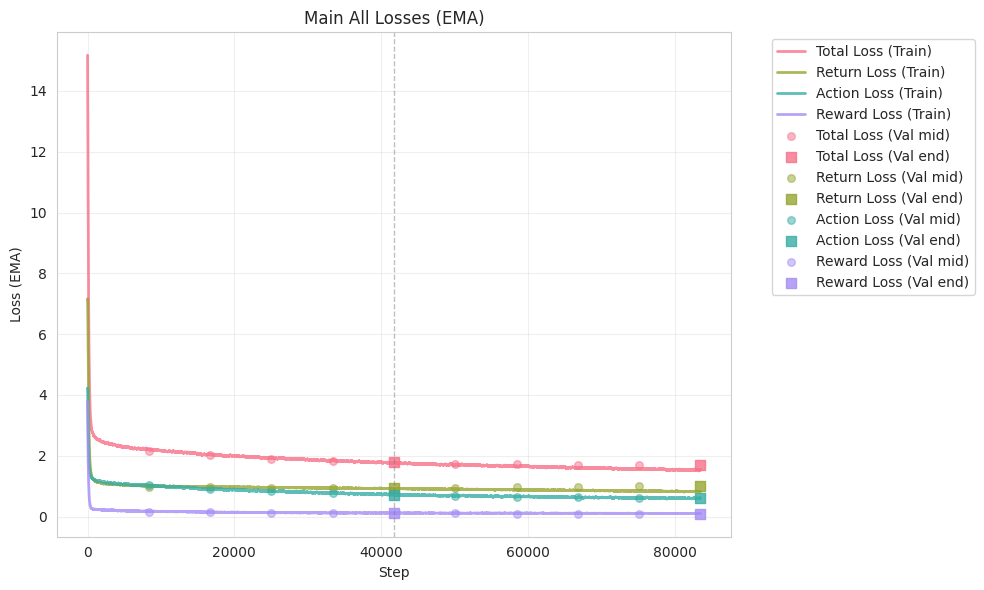

In [12]:
from mgdt_model_stats import plot_losses
plot_losses(main_train_stats, main_val_stats, output_dir=OUTPUT_DIR, title_prefix="Main")

# Test Freeze

In [ ]:
from mgdt_model import Freezeable
model.freeze(components=[Freezeable.Transformer])

# Train - Holdout Games

In [13]:
from mgdt_model_trainer import Encoder, train_mgdt

model, holdout_train_stats, holdout_val_stats = train_mgdt(
    model=model,
    bins=bins,
    dataloader_train=holdout_bundle.train_loader,
    dataloader_val=holdout_bundle.val_loader,
    encoder_type=Encoder.Patch,
    num_epochs=1,
)

Finetune 1/1: 100%|██████████| 4256/4256 [01:40<00:00, 42.49it/s]
                                                               

Saved plot to output/baseline/model_holdout_losses_per_head.png


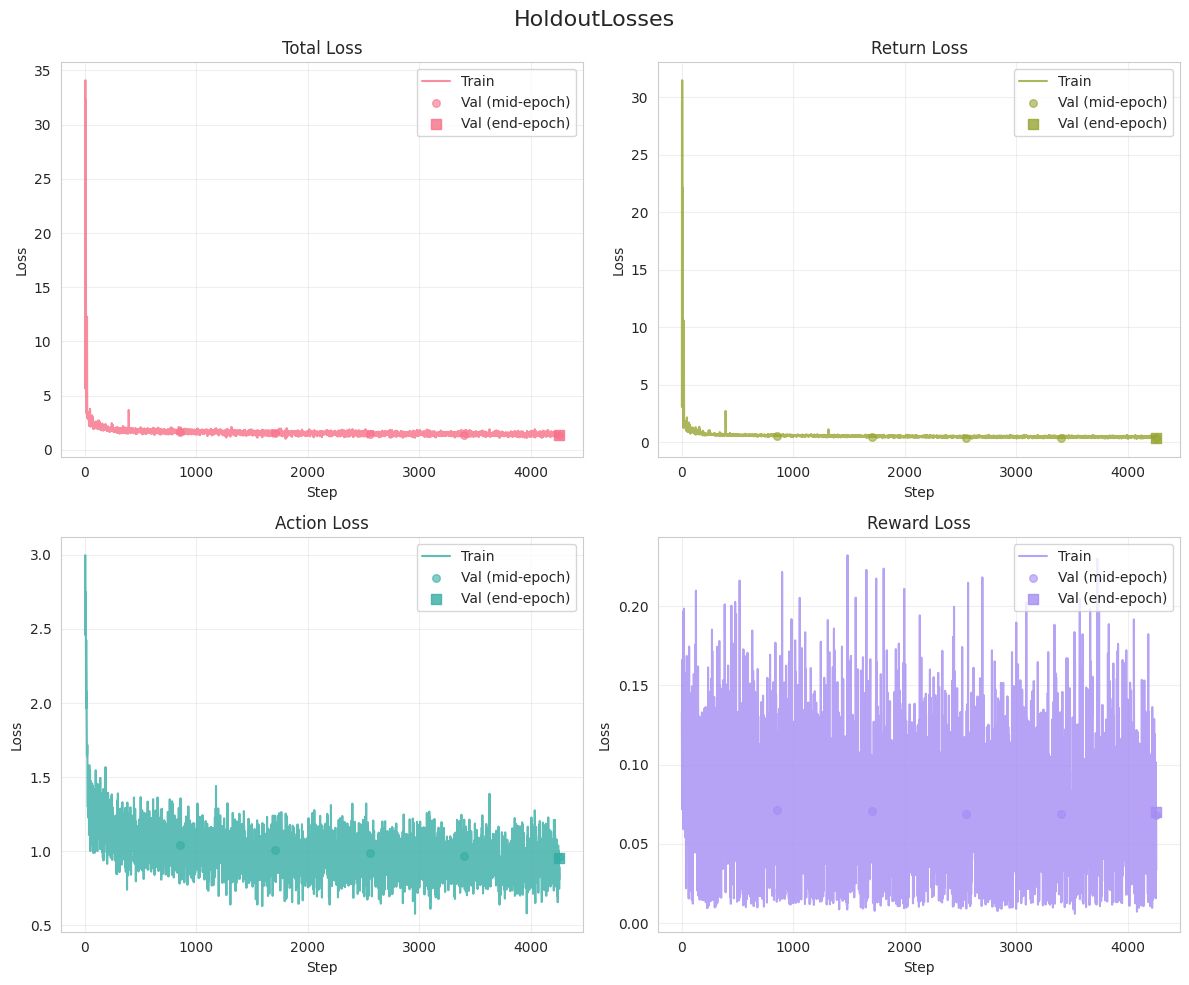

Saved plot to output/baseline/model_holdout_losses_combined.png


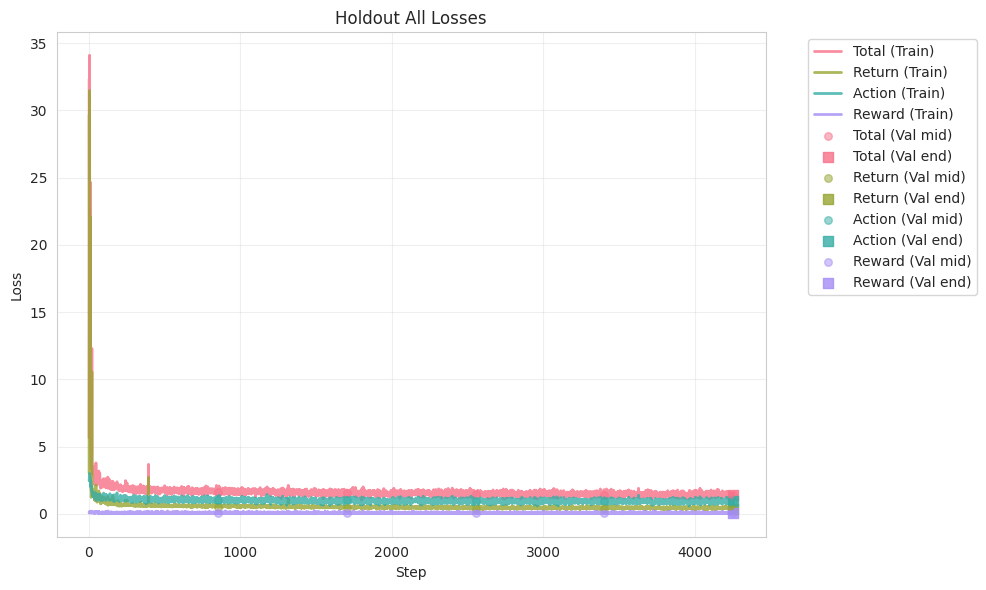

Saved plot to output/baseline/model_holdout_losses_ema_per_head.png


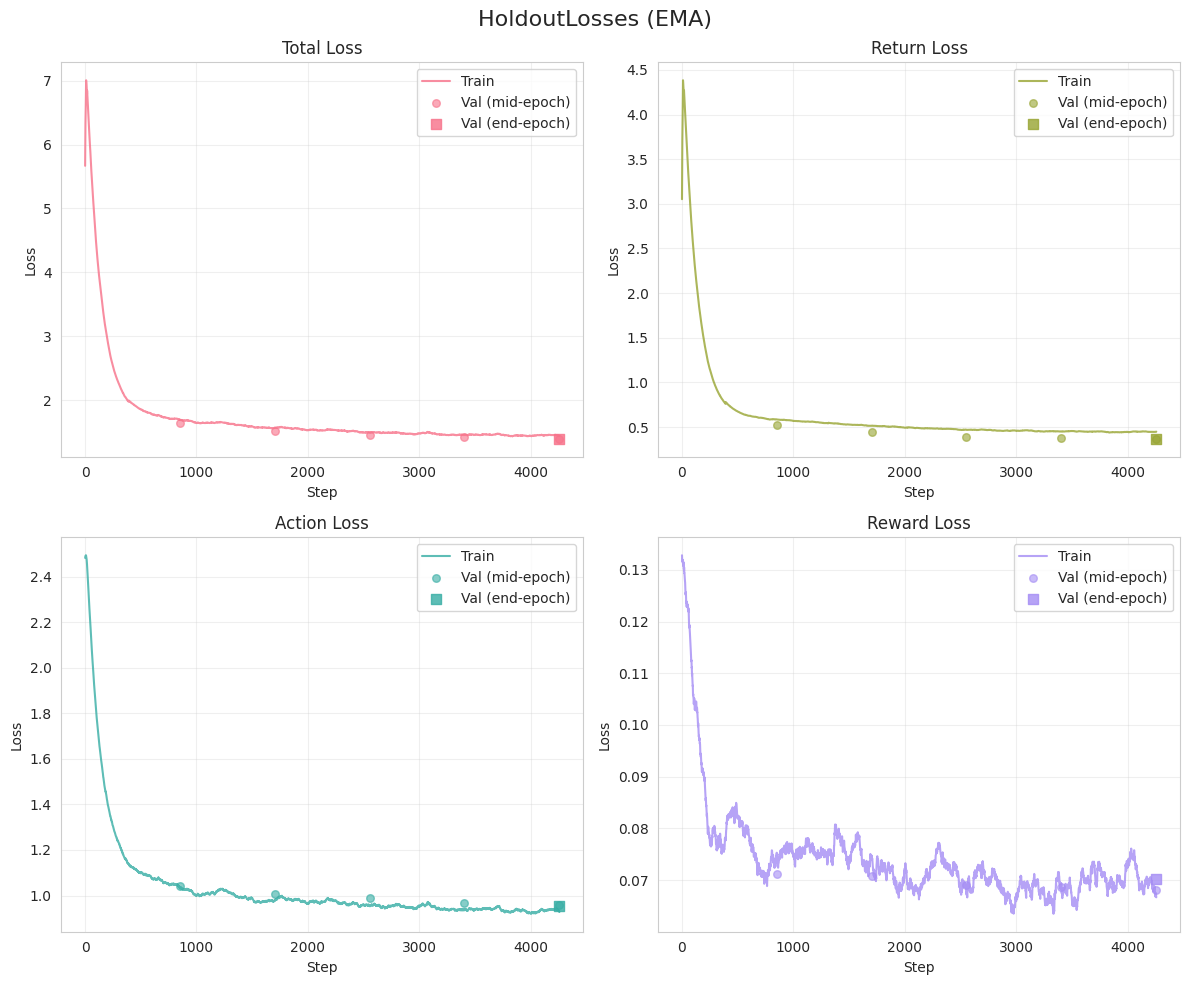

Saved plot to output/baseline/model_holdout_losses_ema_combined.png


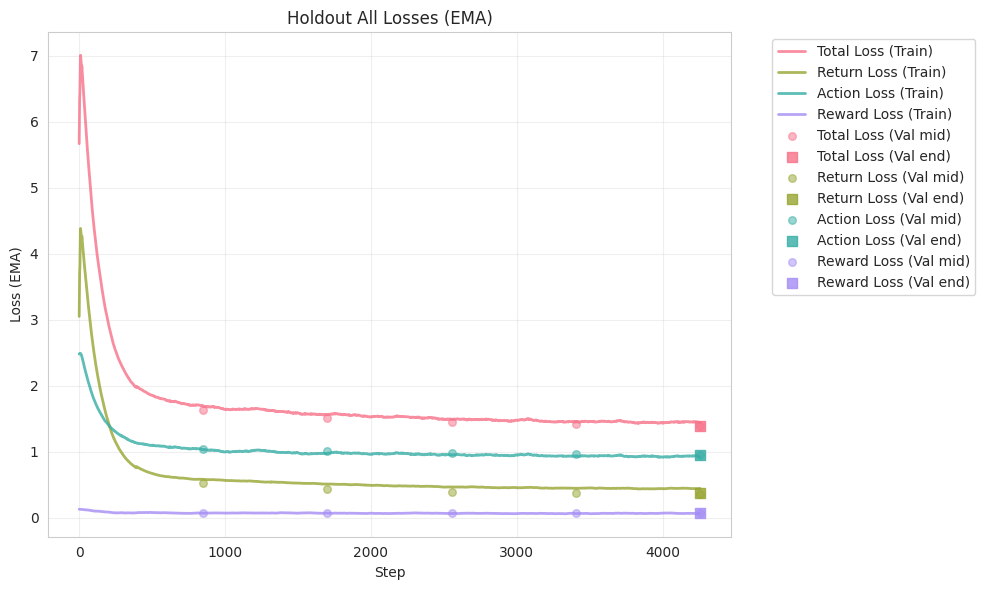

In [14]:
from mgdt_model_stats import plot_losses
plot_losses(holdout_train_stats, holdout_val_stats, output_dir=OUTPUT_DIR, title_prefix="Holdout")

# Comparison

Saved plot to output/baseline/comparison_baseline_main_vs_holdout.png


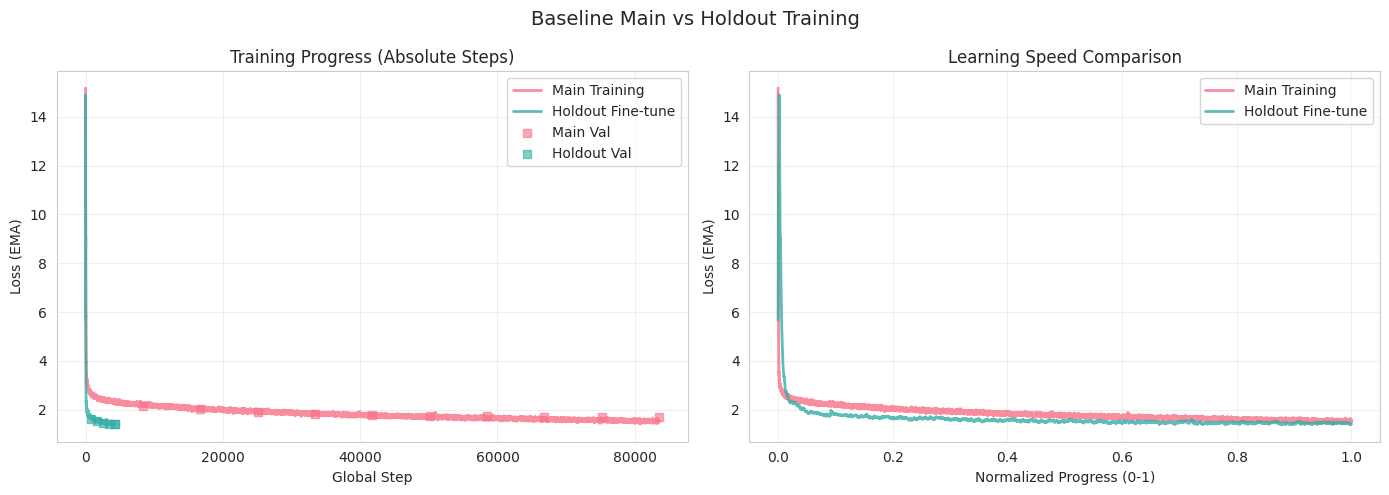

Saved plot to output/baseline/comparison_baseline_per_head_loss.png


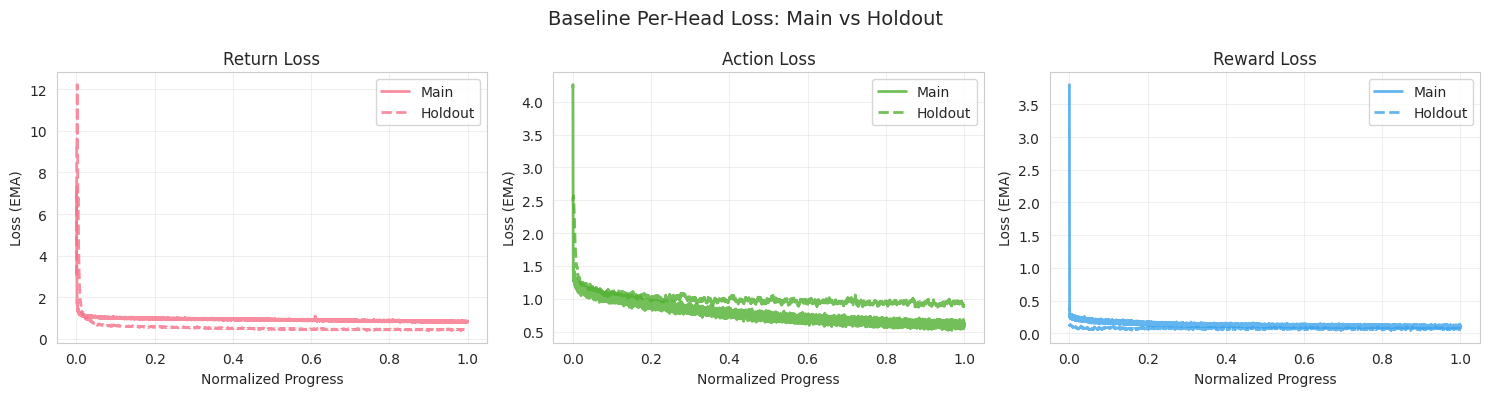

Saved plot to output/baseline/comparison_baseline_accuracy.png


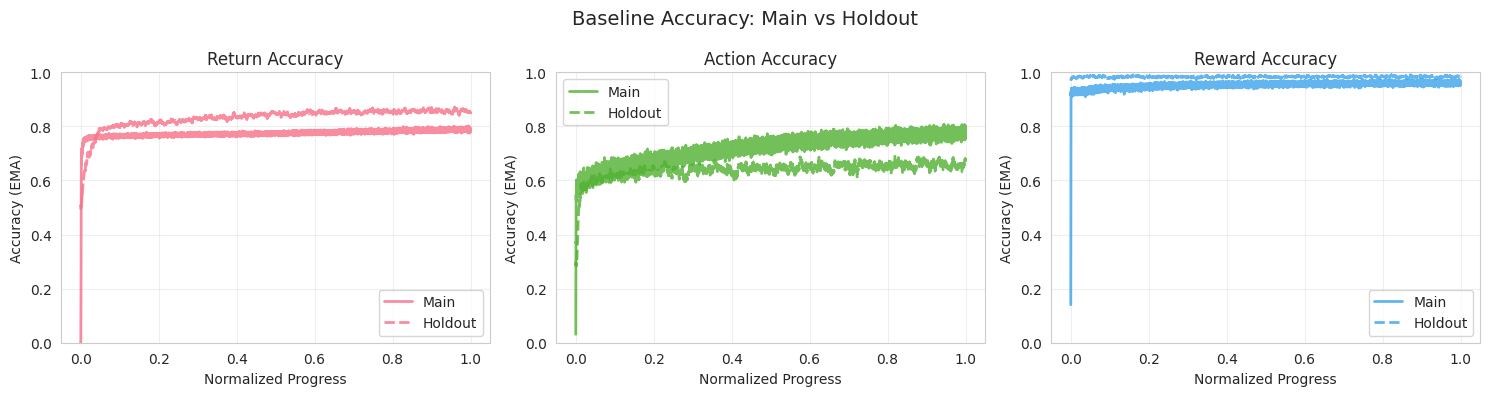


HOLDOUT ADAPTATION SUMMARY
Main training steps: 83510
Holdout fine-tune steps: 4256

Main training - Final loss (EMA): 1.5592
Holdout fine-tune - Initial loss (EMA): 5.6675
Holdout fine-tune - Final loss (EMA): 1.4059
Holdout loss reduction: 4.2616

Holdout reached main's final loss at step 1340 (31.5% of fine-tuning)


In [15]:
from mgdt_model_stats import plot_holdout_comparison

plot_holdout_comparison(main_train_stats, main_val_stats, holdout_train_stats, holdout_val_stats, output_dir=OUTPUT_DIR, title_prefix="Baseline")

# Model Info and Save

In [16]:
total_params = sum(param.numel() for param in model.parameters())
print(f"Total parameters: {total_params/1e6:.0f}M")

Total parameters: 20M


In [17]:
from utils import save_checkpoint

save_checkpoint(model, main_train_stats, main_val_stats, output_dir=OUTPUT_DIR)

TypeError: save_checkpoint() got multiple values for argument 'output_dir'

In [ ]:
!zip -r output.zip output
from google.colab import files
files.download("output.zip")